## How to Call R from Python: Plotting 

This is a code example in which we use the Python package rpy2 to create R plots. We use the r-packages 'graphics' and 'ggplot2' and display them here in this Jupyter Notebook.

This Notebook is for the [YouTube Video about using Rpy and plotting in Jupyter notebooks](https://youtu.be/RK-n78ZOXUg)

In [6]:
import rpy2.robjects as robjects
from rpy2.robjects.lib import grdevices
from rpy2.robjects.vectors import IntVector
from IPython.display import Image, display

graphics = robjects.packages.importr('graphics')

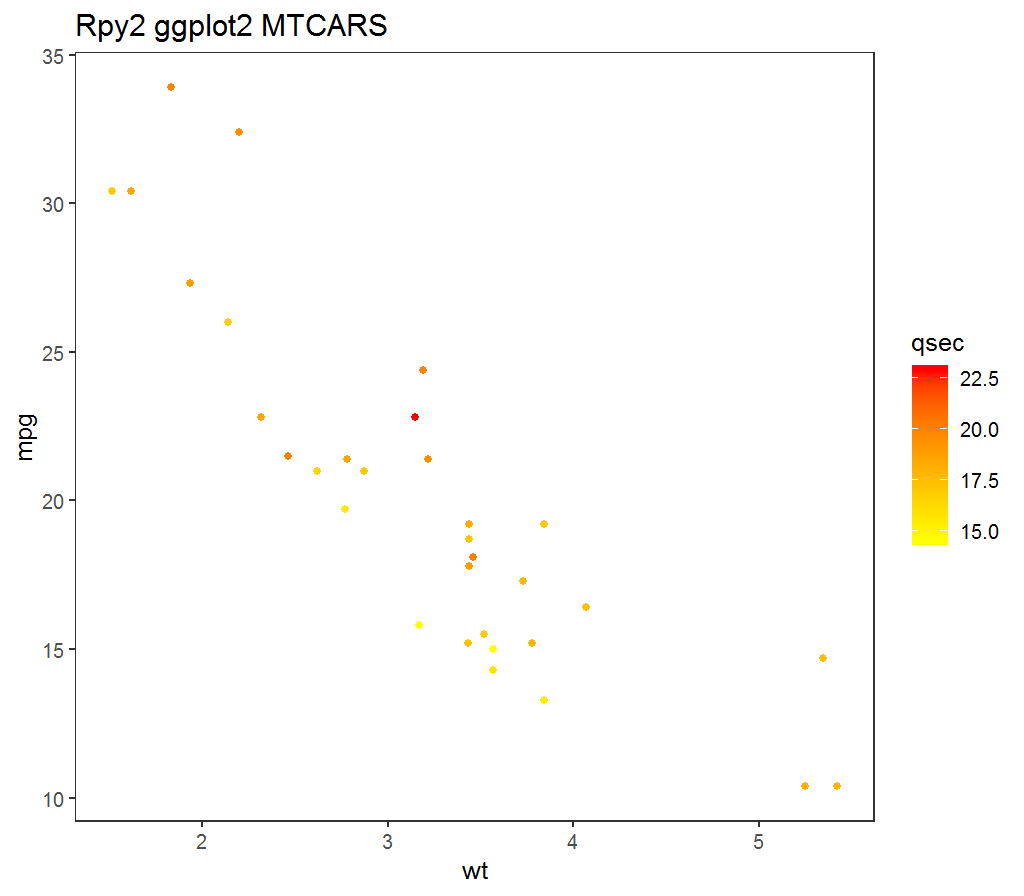

In [11]:
import rpy2.robjects.lib.ggplot2 as ggplot2

datasets = robjects.packages.importr('datasets')
mtcars = robjects.packages.data(datasets).fetch('mtcars')['mtcars']

with grdevices.render_to_bytesio(grdevices.png, width=1024, height=896, res=150) as img:
    gp = ggplot2.ggplot(mtcars)
    pp = (
        gp
        + ggplot2.aes_string(x='wt', y='mpg')
        + ggplot2.geom_point(ggplot2.aes_string(colour='qsec'))
        + ggplot2.scale_colour_gradient(low='yellow', high='red')
        + ggplot2.labs(title='Rpy2 ggplot2 MTCARS')
        + ggplot2.theme_bw()
        + ggplot2.theme(**{'panel.grid.major': ggplot2.element_blank(),
                           'panel.grid.minor': ggplot2.element_blank()
            
        })
        
    )
    
    pp.plot()
    
display(Image(data=img.getvalue(), format='png', embed=True))